
# Moving Average Crossover Strategy

This notebook implements a simple moving average crossover trading strategy using historical stock data. The strategy involves calculating short-term and long-term moving averages of the stock's closing prices and generating buy/sell signals based on their crossover.

## Libraries Used
- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **matplotlib.pyplot**: For plotting graphs.
- **yfinance**: For downloading historical market data from Yahoo Finance.
- **warnings**: To suppress warnings.

## Function: `moving_average_strategy`
This function calculates moving averages and implements the trading strategy.

### Parameters:
- `ticker`: The stock ticker symbol.
- `short_window`: The window size for the short-term moving average.
- `long_window`: The window size for the long-term moving average.
- `start_date`: The start date for the historical data.
- `end_date`: The end date for the historical data.

### Steps:
1. **Download Historical Data**:
    - Uses `yfinance` to download historical stock data for the specified ticker and date range.

2. **Calculate Moving Averages**:
    - Computes the short-term and long-term moving averages of the closing prices.

3. **Generate Signals**:
    - Initializes a `Signal` column to zero.
    - Sets the signal to 1 (buy) if the short-term moving average is greater than the long-term moving average, otherwise -1 (sell).
    - Shifts the signal by one period to create the `Position` column, which represents the trading position.

4. **Calculate Returns**:
    - Calculates the strategy returns by multiplying the position with the percentage change in closing prices.
    - Calculates the buy and hold returns by computing the percentage change in closing prices.

## Summary
This notebook sets up a moving average crossover strategy, where buy/sell signals are generated based on the crossover of short-term and long-term moving averages. The strategy's performance is then evaluated by comparing the strategy returns with the buy and hold returns.


[*********************100%***********************]  1 of 1 completed


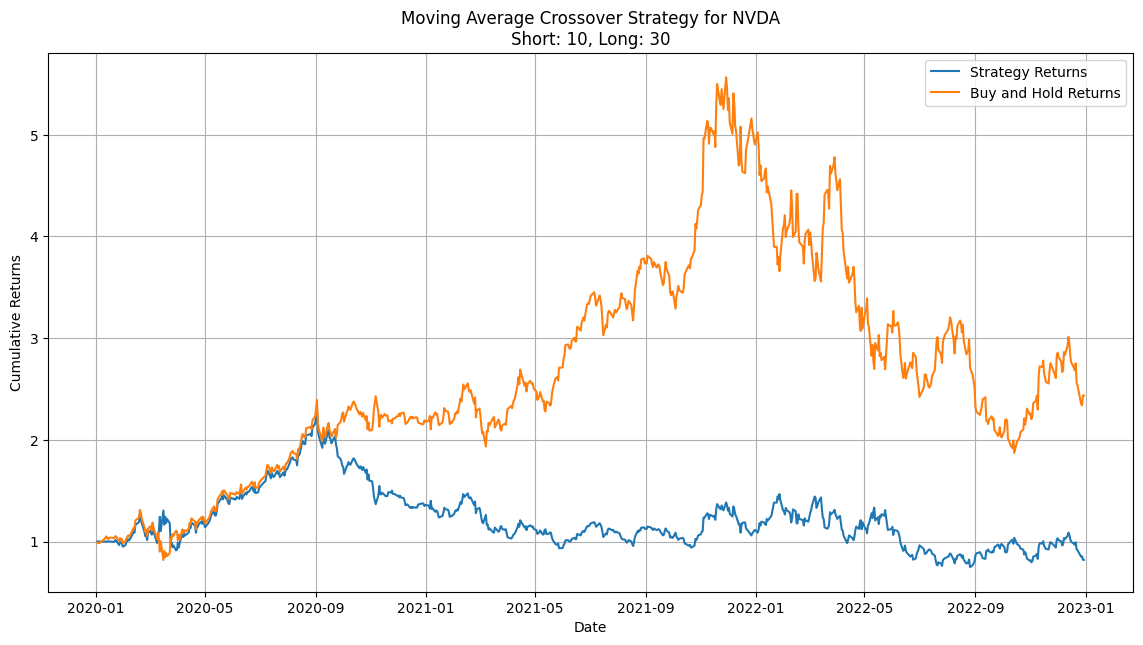

[*********************100%***********************]  1 of 1 completed

Short Window: 10, Long Window: 30
Final Strategy Return: 0.82
Final Buy and Hold Return: 2.44



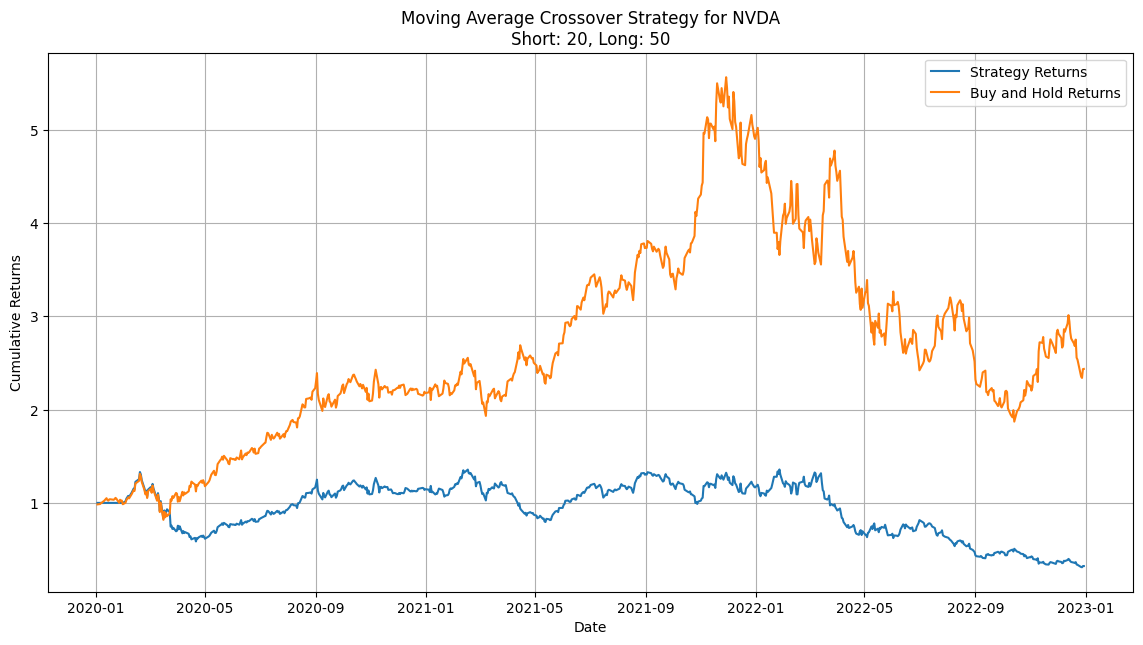

[*********************100%***********************]  1 of 1 completed

Short Window: 20, Long Window: 50
Final Strategy Return: 0.32
Final Buy and Hold Return: 2.44



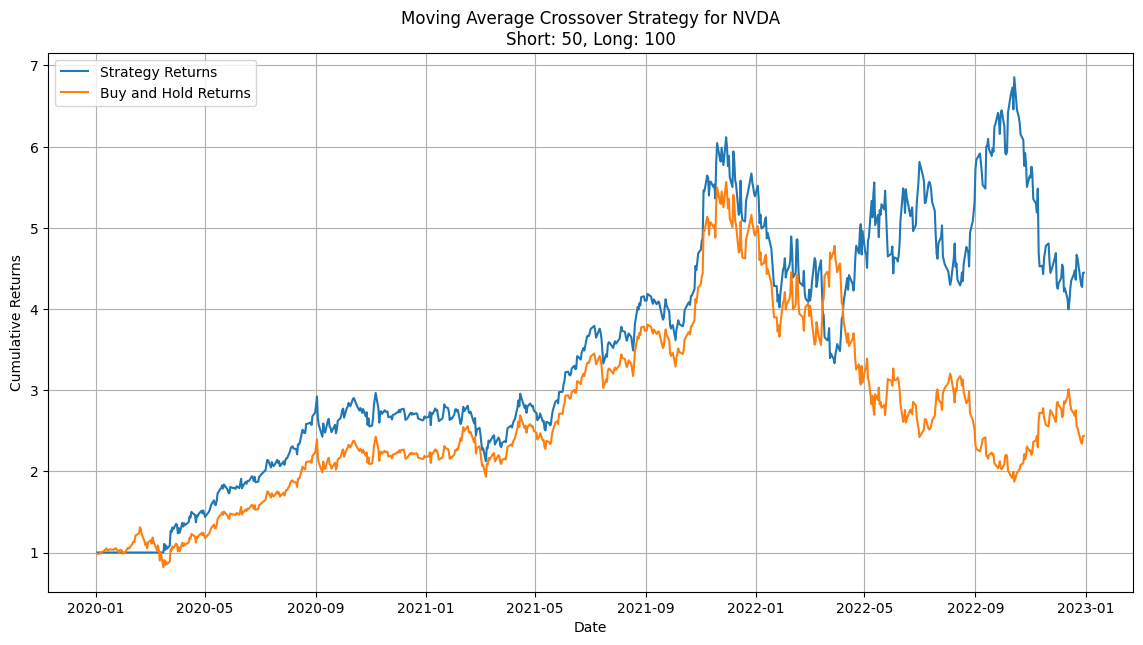

[*********************100%***********************]  1 of 1 completed

Short Window: 50, Long Window: 100
Final Strategy Return: 4.45
Final Buy and Hold Return: 2.44



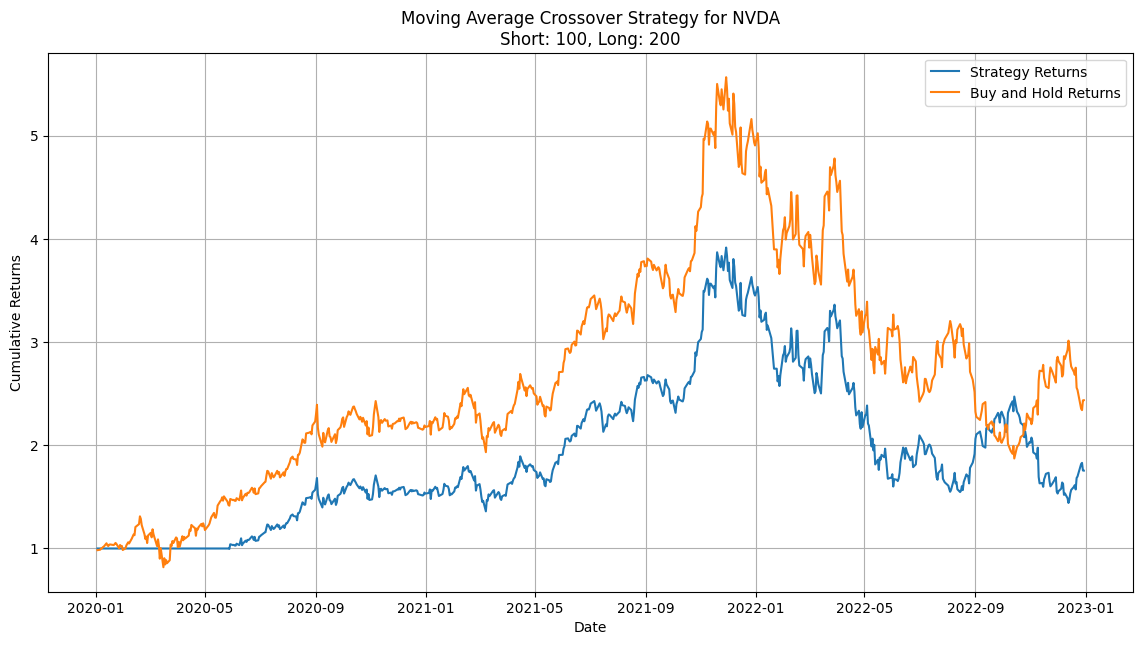

Short Window: 100, Long Window: 200
Final Strategy Return: 1.75
Final Buy and Hold Return: 2.44



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Function to calculate moving averages and strategy
def moving_average_strategy(ticker, short_window, long_window, start_date, end_date):
    # Download historical data
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate moving averages
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    
    # Generate signals
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, -1)
    data['Position'] = data['Signal'].shift()
    
    # Calculate strategy returns
    data['Strategy_Returns'] = data['Position'] * data['Close'].pct_change()
    
    # Calculate buy and hold returns
    data['Buy_Hold_Returns'] = data['Close'].pct_change()
    
    # Compute cumulative returns
    data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()
    data['Cumulative_Buy_Hold_Returns'] = (1 + data['Buy_Hold_Returns']).cumprod()
    
    # Plot results
    plt.figure(figsize=(14, 7))
    plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
    plt.plot(data['Cumulative_Buy_Hold_Returns'], label='Buy and Hold Returns')
    plt.title(f'Moving Average Crossover Strategy for {ticker}\nShort: {short_window}, Long: {long_window}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Print final returns
    strategy_return = data['Cumulative_Strategy_Returns'].iloc[-1]
    buy_hold_return = data['Cumulative_Buy_Hold_Returns'].iloc[-1]
    print(f"Short Window: {short_window}, Long Window: {long_window}")
    print(f"Final Strategy Return: {strategy_return:.2f}")
    print(f"Final Buy and Hold Return: {buy_hold_return:.2f}")
    print()

# Parameters
ticker = 'NVDA'
start_date = '2020-01-01'
end_date = '2023-01-01'

# List of short and long window combinations
window_combinations = [
    (10, 30),
    (20, 50),
    (50, 100),
    (100, 200)
]

# Run the strategy for each combination
for short_window, long_window in window_combinations:
    moving_average_strategy(ticker, short_window, long_window, start_date, end_date)